In [76]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Data Exploration

In [77]:
df_train["ID"].head(10) # The target column is to be predicted
                 # Do I need to keep the ID? No real info brought?
    
print 'The shape of my Dataframe is {0} x {1}' .format(df_train.shape[0],df_train.shape[1])

df_train.describe() # all the data counts for 114,321


The shape of my Dataframe is 114321 x 133


,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [78]:
## Preprocessing ##

# The columns v107 and v91 are the same

try:
    target = df_train["target"]
    ID_test = df_test["ID"]
    ID_train = df_train["ID"]
    df_train.drop(labels= ["target","ID"],axis=1,inplace=True)
    df_test.drop(labels = ["ID"],axis=1,inplace=True)
except:
    
    print("Already extracted these columns. Pass")
    pass


In [79]:
# The columns v107 and v90 are the same

#print(df_train["v92"].value_counts())
print("######v107 and v91 in the training set######")
print df_train["v91"].value_counts()
print df_train["v107"].value_counts()

print("######v107 and v91 in the test set######")

print df_test["v91"].value_counts()
print df_test["v107"].value_counts()


######v107 and v91 in the training set######
A    27079
G    24545
C    23157
B    22683
F    13418
E     3206
D      230
Name: v91, dtype: int64
E    27079
C    24545
D    23157
B    22683
A    13418
F     3206
G      230
Name: v107, dtype: int64
######v107 and v91 in the test set######
A    26947
G    24678
C    23170
B    22591
F    13617
E     3169
D      219
Name: v91, dtype: int64
E    26947
C    24678
D    23170
B    22591
A    13617
F     3169
G      219
Name: v107, dtype: int64


### Using the data from the test set
### We will extract the rows which have no NaN values

In [80]:
# Using the data from the test set
# We will extract the rows which have no NaN values

df_test.describe() # all the data counts for 114,321

print 'The shape of my Dataframe is {0} x {1}' .format(df_test.shape[0],df_test.shape[1])

x_test = df_test.isnull().values

# print(x[0:5])

x_test = x_test.sum(axis=1)

extract_full_rows = (x_test == 0)

full_data = df_test.loc[extract_full_rows,:]
print("Size of the full data DataFrame {0} x {1}".format(full_data.shape[0], full_data.shape[1]))


# Number of rows with n non null values
# Could it be possible to use it as a feature 
# for Machine Learning?

x_test = pd.Series(x_test)
count_df_test = pd.DataFrame(x_test.value_counts())

count_df_test = count_df_test.reset_index()
count_df_test.columns = ["Number of null values per row","Count of Rows"]
count_df_test = count_df_test.sort_values(["Number of null values per row"], ascending=True)
# count_df_test


The shape of my Dataframe is 114393 x 131
Size of the full data DataFrame 17651 x 131


### Let's separate the categorical values from the numerical ones

In [81]:
df_types = df_train.dtypes
selector = df_types == "object"

# My non numerical values
non_num_columns = df_types[selector].index

# My numerical values
num_columns = df_types[~selector].index

df_non_num = df_train.loc[:,non_num_columns]
df_num = df_train.loc[:,num_columns]


# pd.concat([df_non_num,df["target"]],axis=1)
# df["v22"].value_counts()
df_non_num
y = df_non_num["v113"].unique()
y = pd.DataFrame(y)

y.columns = ["label"]
y.loc[y["label"] =="I"]


ref_dict = filter(lambda x: len(x)==1,y.values.flatten()[1:])
len(filter(lambda x: len(x)==1,pd.DataFrame(df_test["v113"].unique()).values.flatten()[1:]))

#def label_encoding(label):
#    
#    ref_dict
#    parsing_list = list(label)
#    if len(parsing_list)>1:
        
#y    
    
    
df_num.columns

Index([u'v1', u'v2', u'v4', u'v5', u'v6', u'v7', u'v8', u'v9', u'v10', u'v11',
       ...
       u'v121', u'v122', u'v123', u'v124', u'v126', u'v127', u'v128', u'v129',
       u'v130', u'v131'],
      dtype='object', length=112)

In [206]:
print("{0} missing spots are different between v116 and v43".format((df_num["v116"].isnull() != df_num["v43"].isnull()).sum()))

0 missing spots are different between v116 and v43


Even with the obvious correlation, we cannot use one variable to fill the empty spots of the other one since they go missing in the same instances.

0.0142619819711


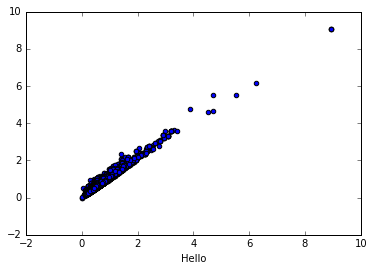

In [143]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


def test_corr(df):
    
    features = df.columns
    
    dummy_df = pd.DataFrame()
    
    corr_list = []
    
    for x in features:
        
        for y in features:
           
            coefficient_of_dermination = r2_score(df[x],df[y])
            
            MSE = mean_squared_error(df[x],df[y])
            
            corr_list.append([x,y,coefficient_of_dermination,MSE])
            
    return pd.DataFrame(corr_list,columns=["X","Y","R2","MSE"])
            
            
    
    
MSE_R2_df = test_corr(df_num.fillna(-10))

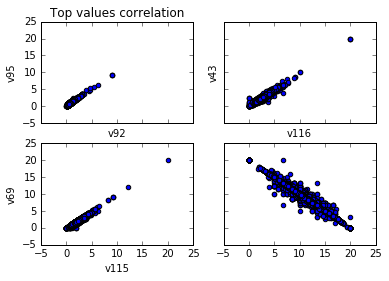

In [197]:

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(df_train["v92"],df_train["v95"])
ax1.set_title('Top values correlation')
ax1.set_xlabel("v92")
ax1.set_ylabel("v95")

ax2.scatter(df_train["v116"],df_train["v43"])
ax2.set_xlabel("v116")
ax2.set_ylabel("v43")


ax3.scatter(df_train["v26"],df_train["v60"])
ax3.set_xlabel("v26")
ax3.set_ylabel("v60")



ax4.scatter(df_train["v115"],df_train["v69"])
ax3.set_xlabel("v115")
ax3.set_ylabel("v69")
# print pd.DataFrame(df_non_num["v22"].unique())
#pd.DataFrame(df_test["v22"].unique())

In [195]:
top_MSE_R2_df = (MSE_R2_df.loc[MSE_R2_df.R2>0.90]).sort_values(["MSE","R2"],ascending=[1,0]).iloc[112::,:]

top_MSE_R2_df

,X,Y,R2,MSE
9037,v95,v92,0.999790,0.005884
8704,v92,v95,0.999787,0.005884
10901,v116,v43,0.999619,0.014262
4241,v43,v116,0.999614,0.014262
2515,v26,v60,0.999389,0.021297
5734,v60,v26,0.999372,0.021297
7755,v83,v33,0.998770,0.045601
3093,v33,v83,0.998765,0.045601
5049,v53,v11,0.999565,0.070850
1053,v11,v53,0.999556,0.070850


In [210]:
from sklearn.preprocessing import StandardScaler
import theano
from theano import tensor as T
from theano.tensor.nnet import sigmoid

Only 17756 rows have complete data. I will run my the theano NN on it to fill the other ones?

<module 'sklearn.preprocessing' from 'C:\Python27\lib\site-packages\sklearn\preprocessing\__init__.pyc'>
